In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import mne
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
import warnings
from scipy import signal
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy import misc



from sklearn.metrics import mean_squared_error
from math import sqrt
sns.set_context("poster", font_scale=1.4)


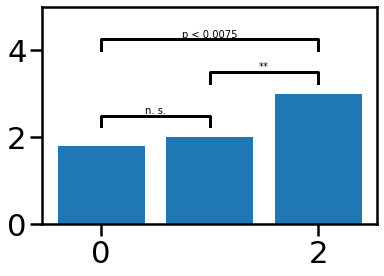

In [2]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)
    
    return

heights = [1.8, 2, 3]
bars = np.arange(len(heights))

plt.figure()
plt.bar(bars, heights,align = 'center')
plt.ylim(0, 5)
barplot_annotate_brackets(0, 1, .1, bars, heights)
barplot_annotate_brackets(1, 2, .001, bars, heights)
barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, heights, dh=.2)

[[16.32723241]] [671.77094535]


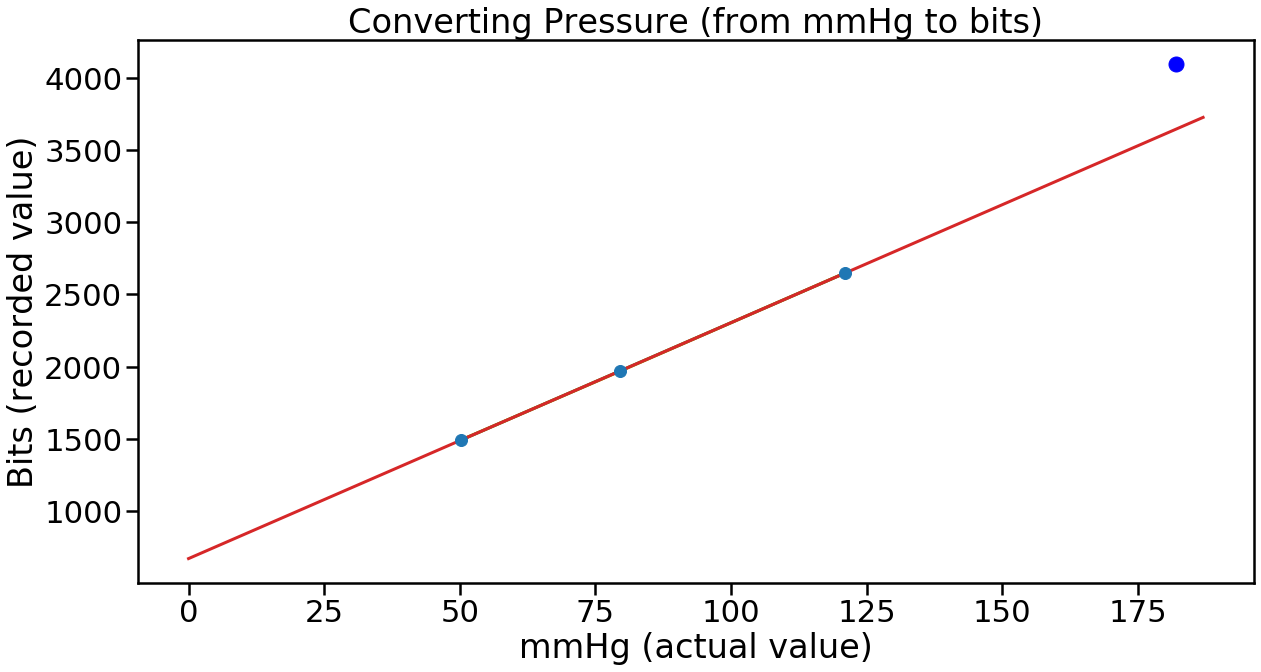

In [3]:
bar067_data = pd.read_csv("data/calibration/066bar_0125.csv", delimiter = ",") # between 0.066 and 0.068 bar
bar106_data = pd.read_csv("data/calibration/107bar_0125.csv", delimiter = ",") # between 0.066 and 0.068 bar
bar1615_data = pd.read_csv("data/calibration/160bar_0125.csv", delimiter = ",") # between 0.066 and 0.068 bar
bar242_data = pd.read_csv("data/calibration/242bar_0125.csv", delimiter = ",") # between 0.066 and 0.068 bar

bar067 = np.round(np.mean(bar067_data), 2)
bar106 = np.round(np.mean(bar106_data), 2)
bar1615 = np.round(np.mean(bar1615_data), 2)
bar242 = np.round(np.mean(bar242_data), 2)

def barstommHg(bars, roundto=1):
    return np.round(bars*750,roundto)

def rms(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))

true067, true106, true1615, true242 = barstommHg(.067), barstommHg(.106), barstommHg(.1615,0), barstommHg(.242,0)

xvals = np.array([true067, true106, true1615])
allbars = [bar067_data, bar106_data, bar1615_data]
avgbitvalue = [bar067[0], bar106[0], bar1615[0]]


linreg = LinearRegression()
linreg.fit(np.array(xvals).reshape(-1,1),np.array(avgbitvalue).reshape(-1,1))

y_train_pred = linreg.predict(np.array(xvals).reshape(-1,1))


yerror = [rms(np.ones(eachbardata.shape[0])*np.mean(eachbardata)[0], eachbardata) for eachbardata in allbars]
fig = plt.subplots(1,1,figsize = (20,10))
plt.errorbar(xvals, avgbitvalue, yerr=yerror, fmt='o')
plt.plot(xvals, avgbitvalue)
plt.plot(xvals,y_train_pred)
plt.xlabel('mmHg (actual value)')
plt.ylabel('Bits (recorded value)')
plt.title('Converting Pressure (from mmHg to bits)')

m, b = linreg.coef_, linreg.intercept_

def y(x):
    return m*x +b
x = np.arange(barstommHg(.25))
# y = m*x + b
plt.plot(x, y(x).T)
print(m, b)
# true242
plt.plot(true242, bar242[0], 'bo', markersize = 15)

def bitstommHg(bits):
    return (bits - b)/m

In [10]:
bitstommHg(2600)

array([[118.09895314]])

In [4]:
sp.misc.derivative(y, 75, dx=1e-6)

array([[16.3272324]])

I need to write a function which will find the derivative of the slope for a range of values where 109/61 is found, say a range of 5 samples. 

1. Find where pressure is 109mmHg.
2. Find the derivative at that point.

# Heading 1

Instead of simply attempting to find the derivative at that location, I could also attempt to fit the data to a curve, and then find the derivative using that function.

In [5]:
a = (np.random.rand(1,103,)*10 + 2)[0]
crossings = np.zeros(a.shape)
counter = 0
for position, each in enumerate(a):
    # position denotes the index of the later value
    
    # check to see if it crosses 10
    if each > 10 and a[position-1] < 10:
        crossings[counter] = position-1
        counter += 1
        print(each, a[position-1])
        if position == 0:
            counter = 0
crossings = [i for i in crossings if i != 0]


11.329547363732033 4.130267810258545
10.576154500966275 9.117037228802676
11.347840356923816 2.7687359743126887
10.732146056555973 2.5105936333317573
10.794281151177518 4.370201251696326
10.7121311923429 6.554553044849756
10.229074453317363 2.963415320694149
10.089194932580568 8.092934166632705
10.154323329194257 3.941870766767412
11.22137139945952 2.4110295018305896
10.420234726276375 9.219824721009369
11.196666059464453 6.6288009718169265
11.358772651896098 2.085814654692904
10.31418090127944 2.369548219086705
10.74275144213081 9.46408644980363
11.731985241385846 8.935399929557402
10.36605192732218 9.425725764932936
11.051068146160897 9.844310191888738


In [4]:
def find_nearest(array, value):
    '''
    returns the index of the value nearest to the sought after value
    '''
    a = np.asarray(array)
    crossings = np.zeros(a.shape)
    counter = 0
    for position, each in enumerate(a):
        # position denotes the index of the later value

        # check to see if it crosses the value
        if each > value and a[position-1] < value:
            crossings[counter] = position-1
            counter += 1
            if position == 0:
                counter = 0
    crossings = [i for i in crossings if i != 0]
    return np.asarray(crossings).T

def pressureDips(pressures, range_of_values, value_sought):
    '''
    INPUTS: 
    pressures = the array of pressure values in bits
    range_of_values = the number of values we're taking into account when calculating the derivative
    value_sought = the pressure value we're looking for (systolic/diastolic)
    
    OUTPUTS:
    derivatives = array of derivatives found
    '''
    
    # find where the pressure is found (get indices)
    p_index = np.asarray(np.where(np.array(pressures) == value_sought)[0])
    
    if len(p_index) == 0:
        p_index = np.asarray(find_nearest(pressures, value_sought))[0]
        
    # get derivative    
    # check to see if odd, if so, subtract 1 (for sake of getting even on both sides)
    if range_of_values%2:
        range_of_values = range_of_values - 1
    
    derivatives = np.zeros(p_index.shape)
    
    xleft = [int(each) for each in p_index - (range_of_values/2)]
    xright = [int(each) for each in p_index + (range_of_values/2)]
    
    for counter, each_index in enumerate(p_index):
        derivatives[counter] = (pressures.iloc[xright[counter]][0] - pressures.iloc[xleft[counter]][0])/(range_of_values)
        
    return derivatives

This is all seven trials for blood pressure using the widest syringe, with a focus on the first.

In [5]:
pressure_gauge01_01 = pd.read_csv("data/potentially_aileentest02_0124.csv", delimiter = ",") # biggest gauge, 22 ga?
pressure_gauge02 = pd.read_csv("data/aileentest03_0124.csv", delimiter = ",") # second biggest gauge, 23
pressure_gauge03 = pd.read_csv("data/aileentest04_0124.csv", delimiter = ",") # third biggest gauge, 25
pressure_gauge04 = pd.read_csv("data/aileentest05_0124.csv", delimiter = ",")[0:1400] # fourth biggest gauge, 27
pressure_gauge05_30 = pd.read_csv("data/more pressure/aileentest01_smallest_0124.csv", delimiter = ",") # 30 ga
# pressure_gauge01_02 = pd.read_csv("data/more pressure/aileentest05_smallest_0124.csv", delimiter = ",") # 22 ga
pressure_gauge_free = pd.read_csv("data/more pressure/aileentest02_smallest_0124.csv", delimiter = ",") # no syringe

# pressure_gauge01 = pd.concat([pressure_gauge01_01, pressure_gauge01_02], join = 'inner')

pressures = [pressure_gauge01_01, pressure_gauge02, pressure_gauge03, pressure_gauge04, pressure_gauge05_30, pressure_gauge_free]

# pressures = [pressure_gauge01_01, pressure_gauge01_02, pressure_gauge01, pressure_gauge04, pressure_gauge05_30, pressure_gauge_free]



When comparing all the graphs together, I want to see if there is any statistically significant differences amongst the various pairings. 

I want to answer the question, "Is the derivative the same for all of them, no matter the gauge?"

"Are the means significantly different from each other?"

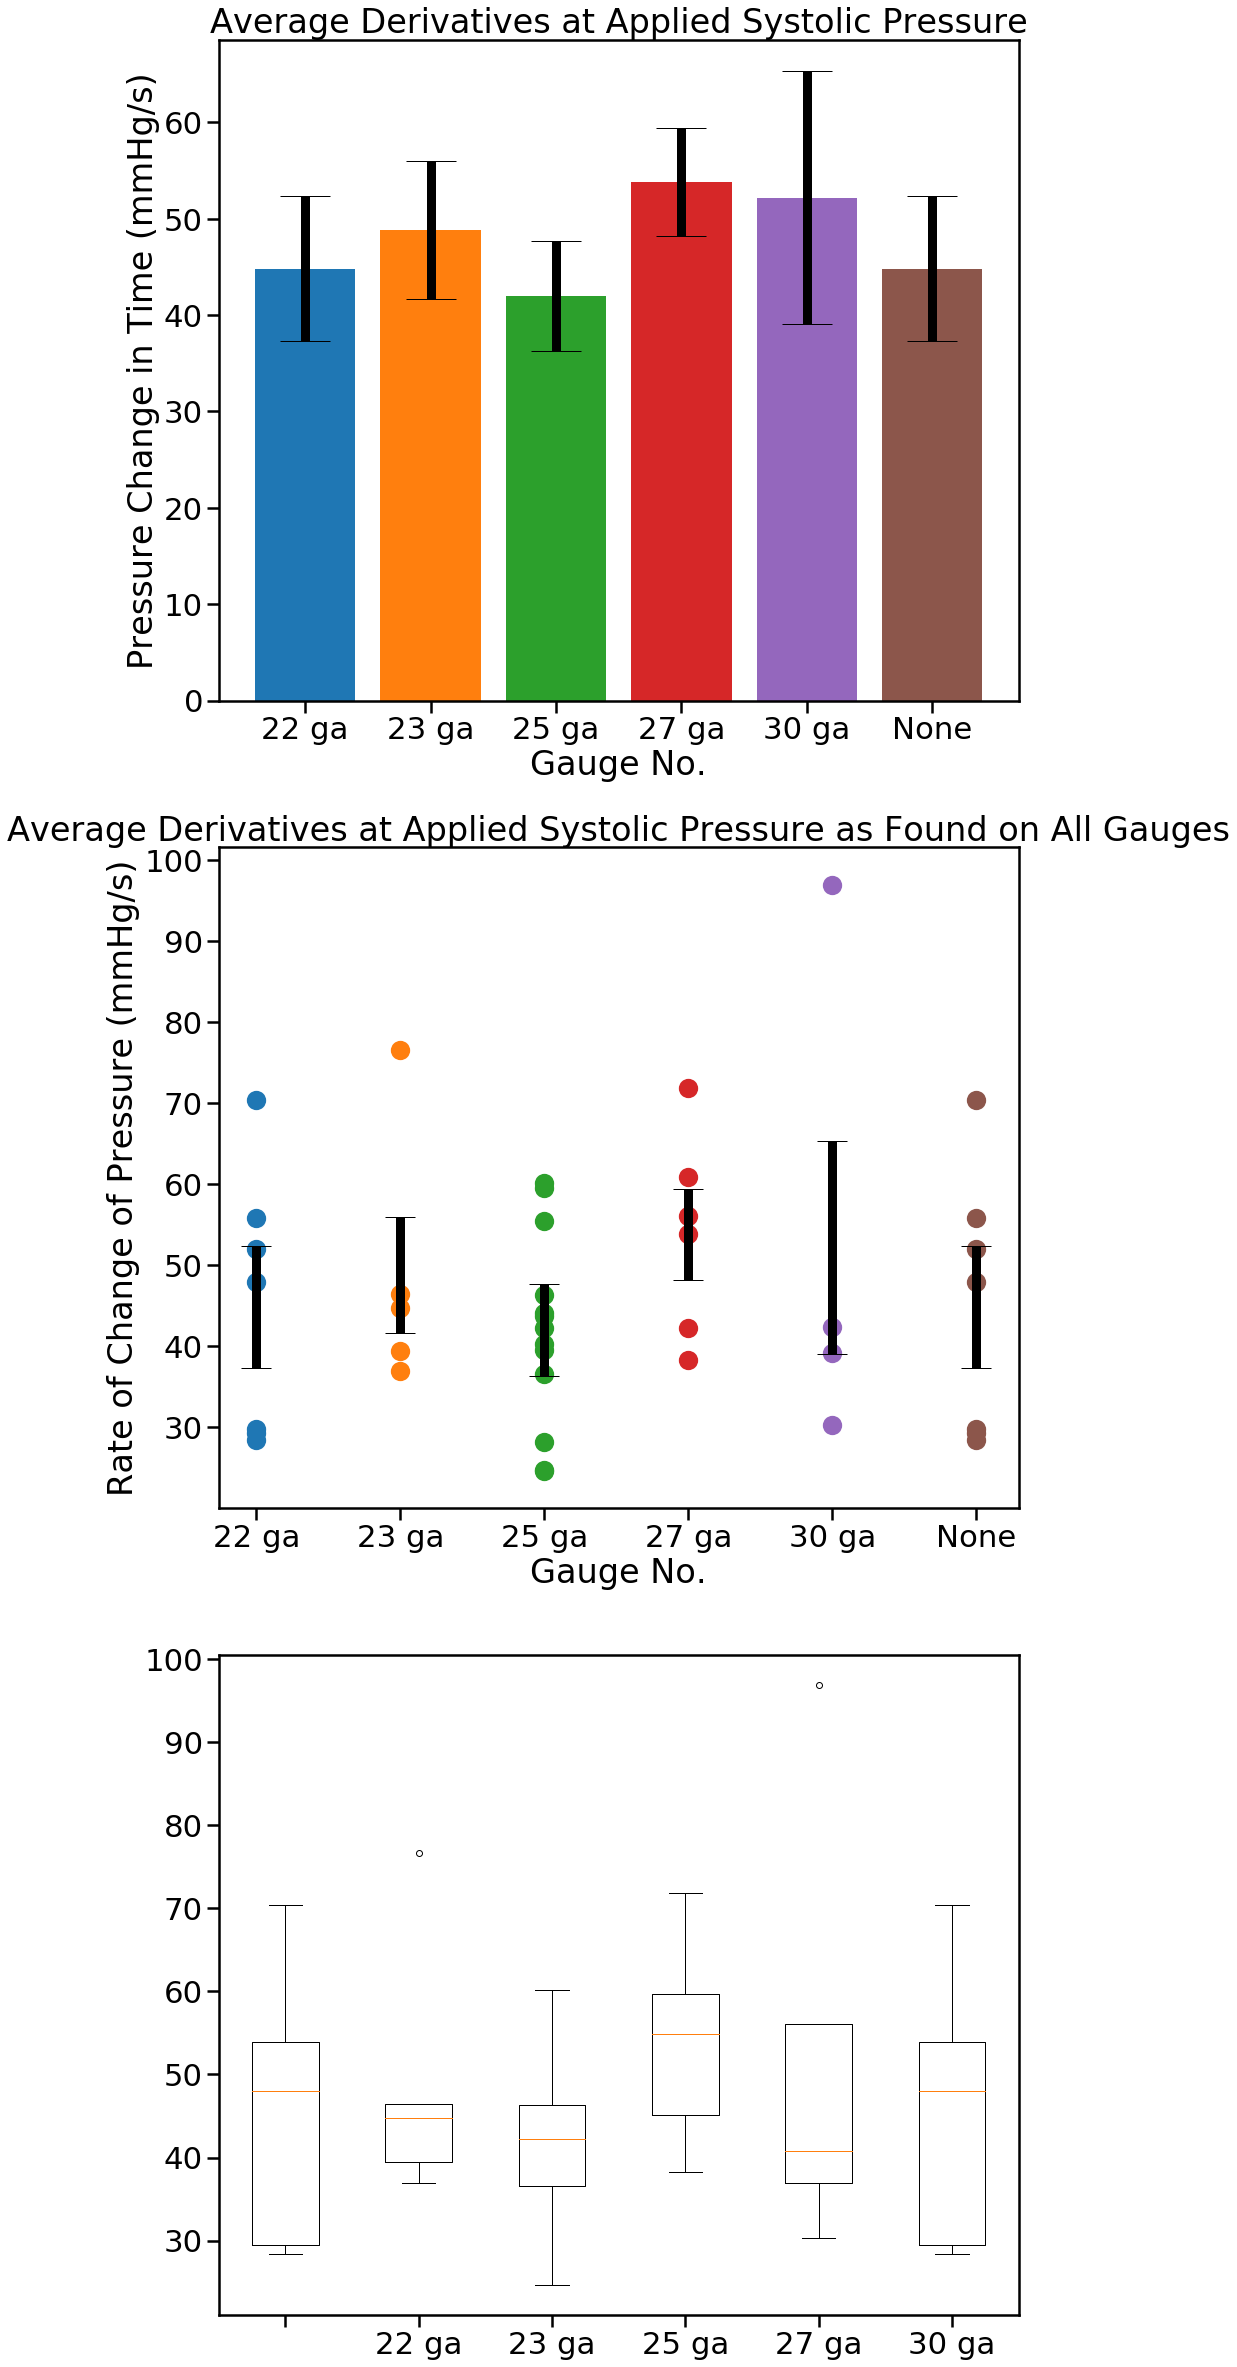

In [6]:
deriv_bank = {}
deriv_bank['derivatives'] = {}
deriv_bank['sd'] = {}

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (16,33))
xlabels = ('','22 ga', '23 ga', '25 ga', '27 ga', '30 ga', 'None')

plt.setp((ax1, ax2, ax3), xticklabels=xlabels)

for counter, each_pressure in enumerate(pressures):
    each_pressure = pd.DataFrame(bitstommHg(each_pressure))
    deriv_bank['derivatives'][str(counter)] = pressureDips(each_pressure, 3, 110)
    ax1.bar(counter, deriv_bank['derivatives'][str(counter)].mean())
    ax1.errorbar(counter, deriv_bank['derivatives'][str(counter)].mean(), yerr=(np.std(pressureDips(each_pressure, 3, 110))/2), ecolor='k', capsize = 25, elinewidth = 9)
    ax2.scatter(np.zeros(deriv_bank['derivatives'][str(counter)].shape)+counter, deriv_bank['derivatives'][str(counter)], s = 300)
    ax2.errorbar(counter, deriv_bank['derivatives'][str(counter)].mean(), yerr=(np.std(pressureDips(each_pressure, 3, 110))/2), ecolor='k', capsize = 15, elinewidth = 9)
    deriv_bank['sd'][str(counter)] = np.std(deriv_bank['derivatives'][str(counter)])

ax1.set_title('Average Derivatives at Applied Systolic Pressure')
ax1.set_xlabel('Gauge No.')
ax1.set_ylabel('Pressure Change in Time (mmHg/s)')

ax2.set_title('Average Derivatives at Applied Systolic Pressure as Found on All Gauges')
ax2.set_xlabel('Gauge No.')
ax2.set_ylabel('Rate of Change of Pressure (mmHg/s)')

list_derivs = [deriv_bank['derivatives'][str(0)], deriv_bank['derivatives'][str(1)], deriv_bank['derivatives'][str(2)], deriv_bank['derivatives'][str(3)], deriv_bank['derivatives'][str(4)], deriv_bank['derivatives'][str(5)]]

ax3.boxplot(list_derivs)

# fig, ax = plt.subplots(1,1)
# ax = sns.violinplot(data=deriv_bank['derivatives'])
fig.tight_layout()


# deriv_bank_derivs = pd.DataFrame(deriv_bank['derivatives'])

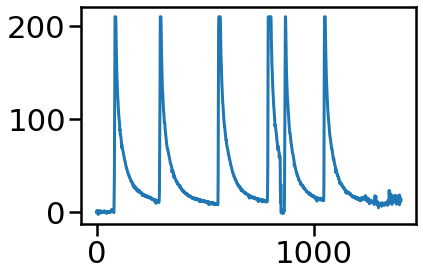

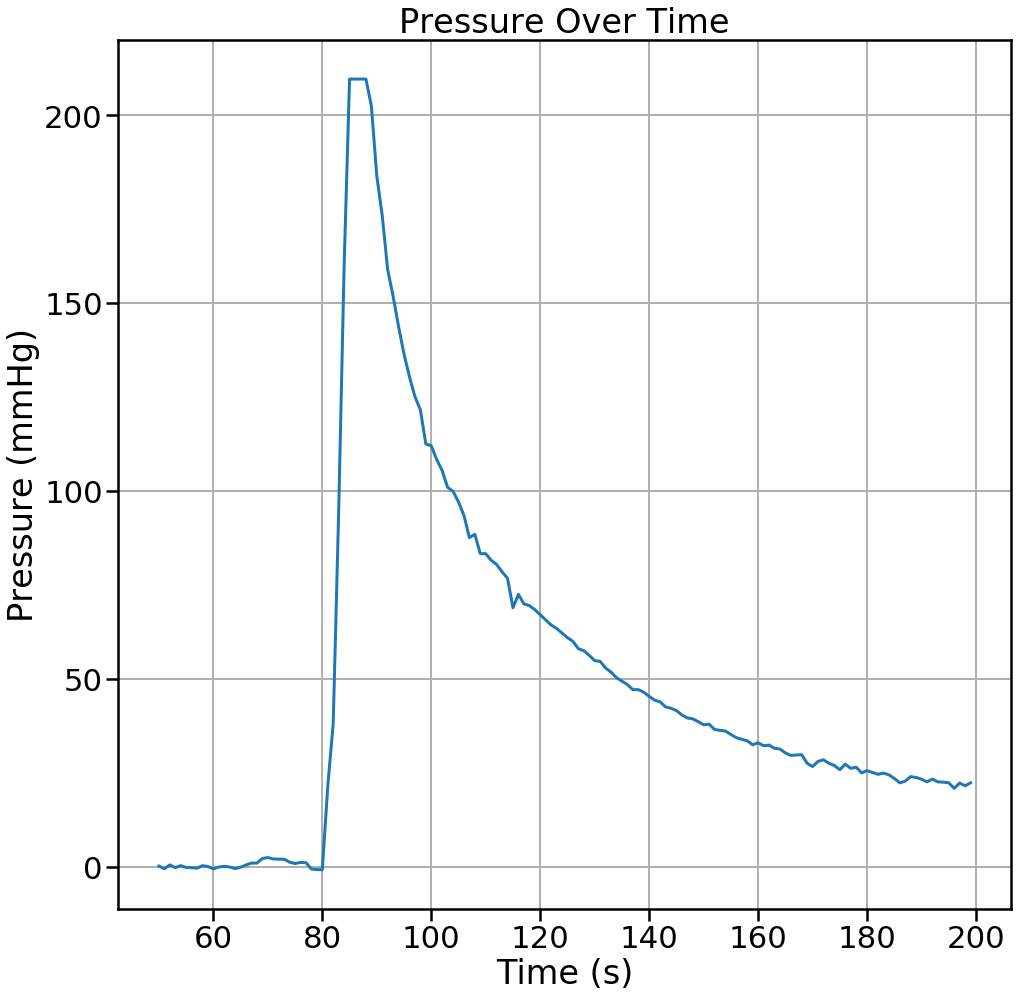

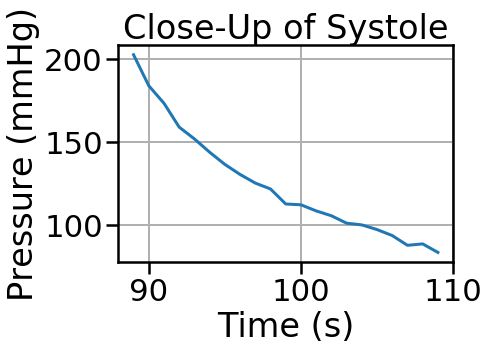

In [7]:
plt.plot(bitstommHg(pressure_gauge04));
plt.show()
fig, ax = plt.subplots(1,1, figsize = (16,16))
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')

plt.plot(bitstommHg(pressure_gauge04)[50:200])
plt.title('Pressure Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.grid(True)
plt.show()

plt.plot(bitstommHg(pressure_gauge04)[89:110])
plt.title('Close-Up of Systole')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.grid(True)
plt.show();

In [8]:
# create a derivative function 
def derivs(pressurepoints):
    pressurepoints = np.array(pressurepoints)
    deriv = list()
    for counter, each in enumerate(pressurepoints):
        if counter != 0:
            deriv.append(pressurepoints[counter]-pressurepoints[counter-1])
    return deriv

50

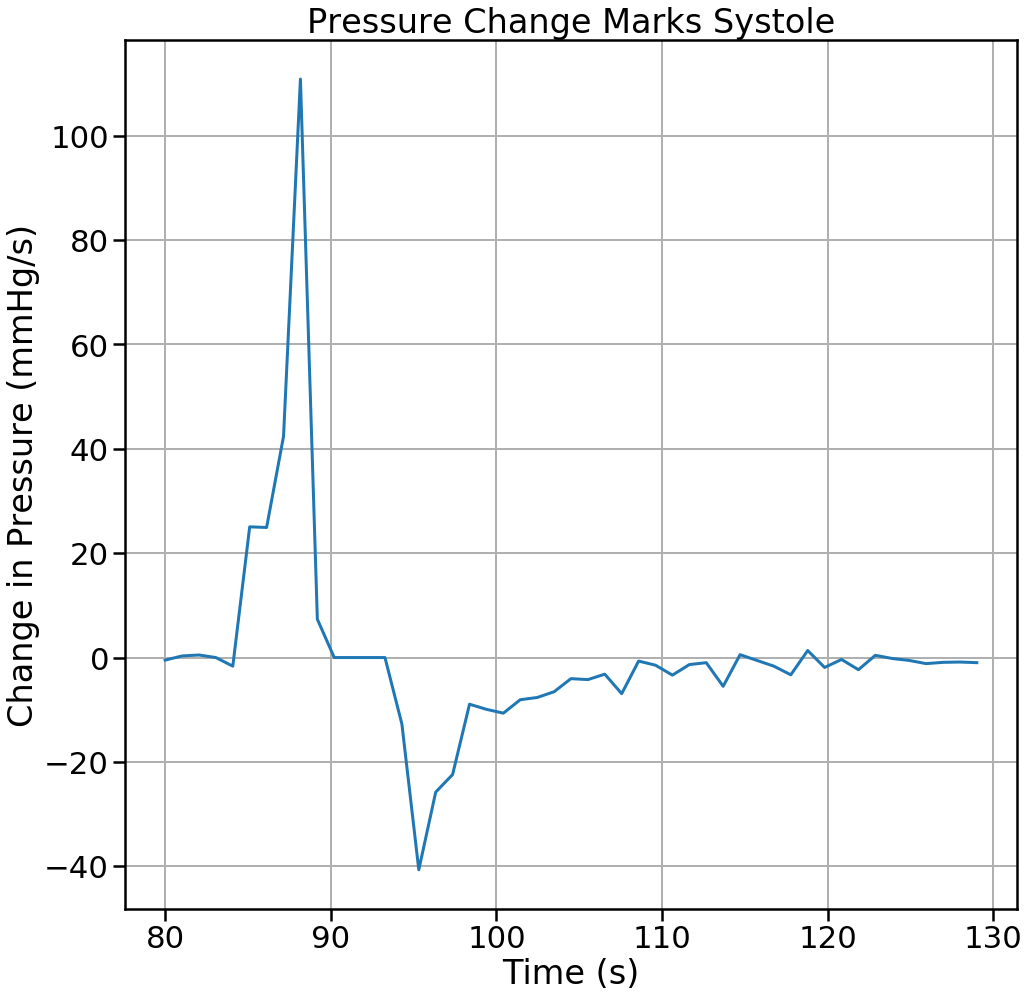

In [9]:
fig, ax = plt.subplots(1,1, figsize = (16,16))
plt.xlabel('Time (s)')
plt.ylabel('Change in Pressure (mmHg/s)')
plt.grid()
transformed = bitstommHg(pressure_gauge02[130:180])
deriv1 = derivs(transformed.Pressure)
plt.title('Pressure Change Marks Systole')
plt.plot(np.linspace(80,129,49),deriv1);



# transformed = bitstommHg(pressure_gauge04[50:200])
# deriv1 = derivs(transformed.Pressure)
len(transformed)
# plt.plot(deriv1)

In [53]:
for each in bitstommHg(pressure_gauge02)[100:200]:
    print(each)

Pressure


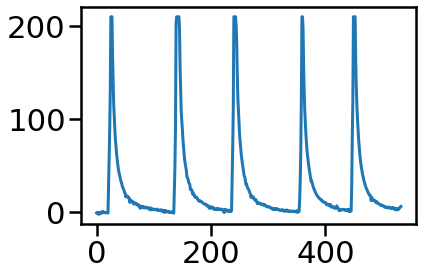

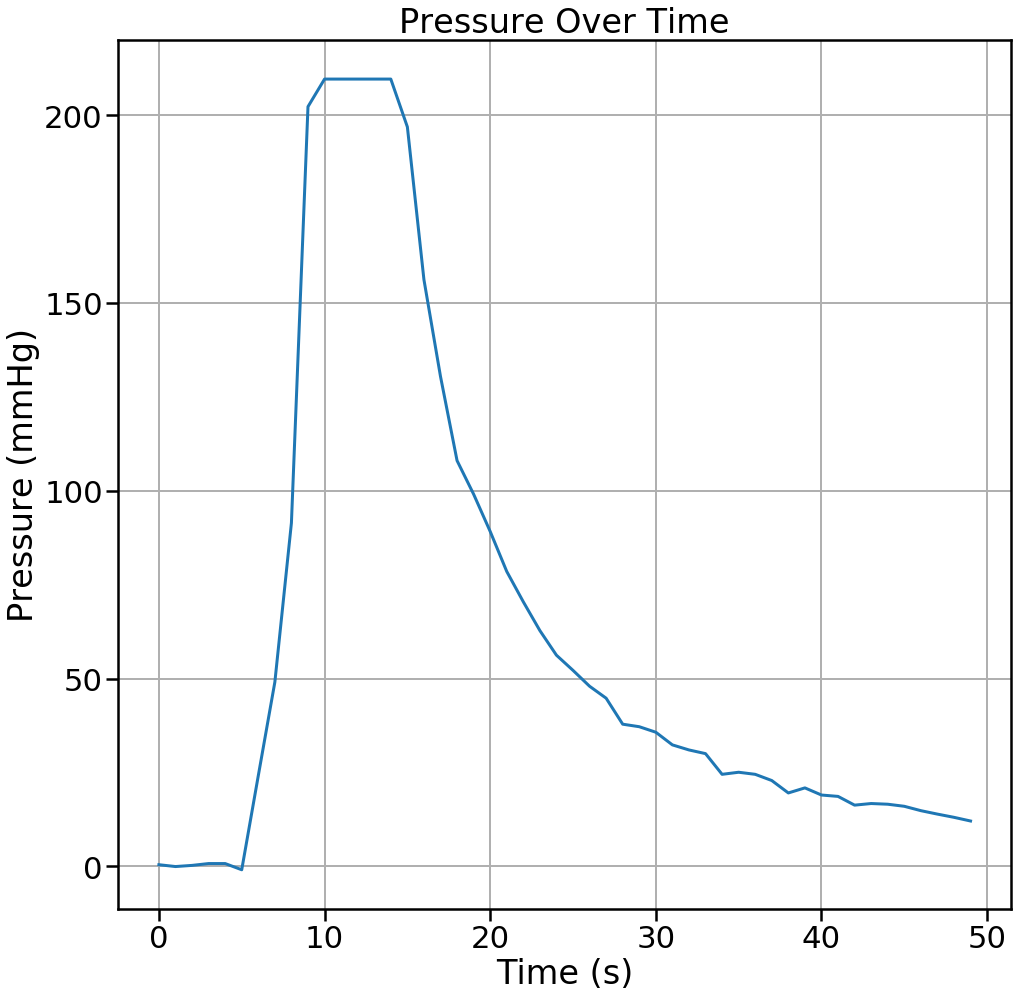

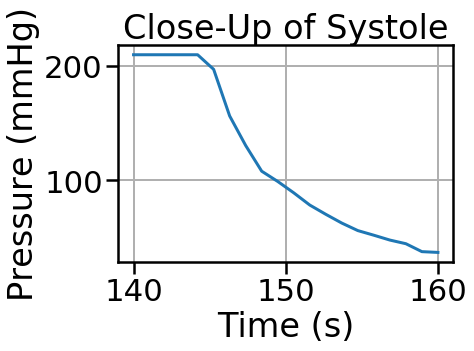

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [10]:
plt.plot(np.array(bitstommHg(pressure_gauge02)));
plt.show()
fig, ax = plt.subplots(1,1, figsize = (16,16))
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')

plt.plot(np.array(bitstommHg(pressure_gauge02)[130:180]))
plt.title('Pressure Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.grid(True)
plt.show()

plt.plot(np.linspace(140,160, 20), np.array(bitstommHg(pressure_gauge02)[140:160]))
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.title('Close-Up of Systole')
plt.grid(True)
plt.show();
plt.tight_layout

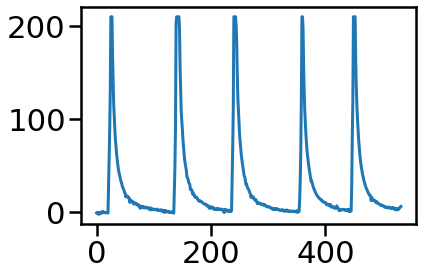

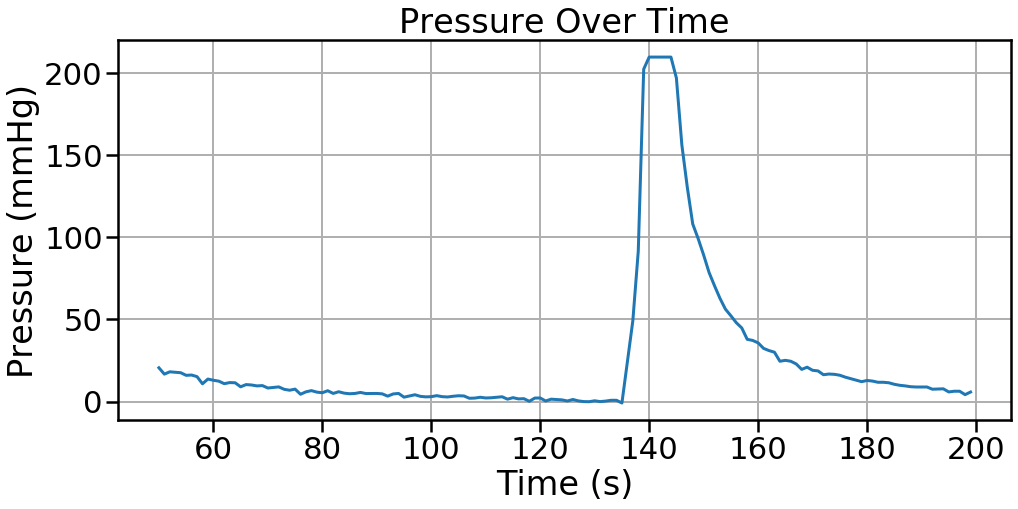

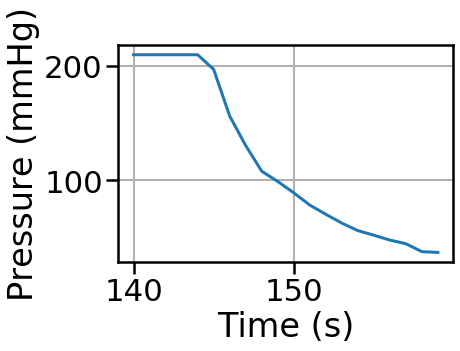

In [11]:
plt.plot(bitstommHg(pressure_gauge02));
plt.show()
fig, ax = plt.subplots(1,1, figsize = (16,7))
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')

plt.plot(bitstommHg(pressure_gauge02)[50:200])
plt.title('Pressure Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.grid(True)
plt.show()

plt.plot(bitstommHg(pressure_gauge02)[140:160])
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.grid(True)
plt.show();

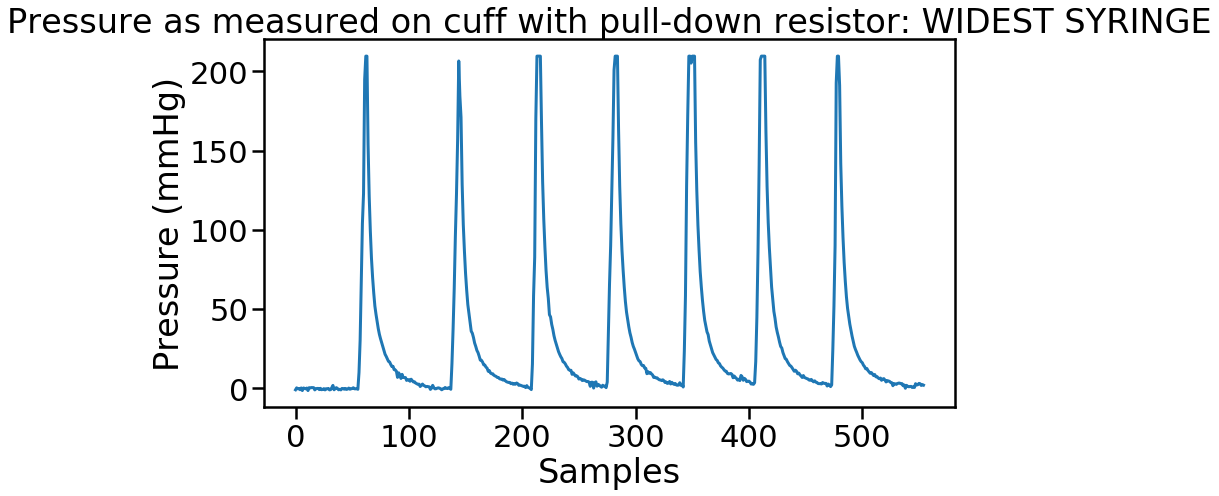

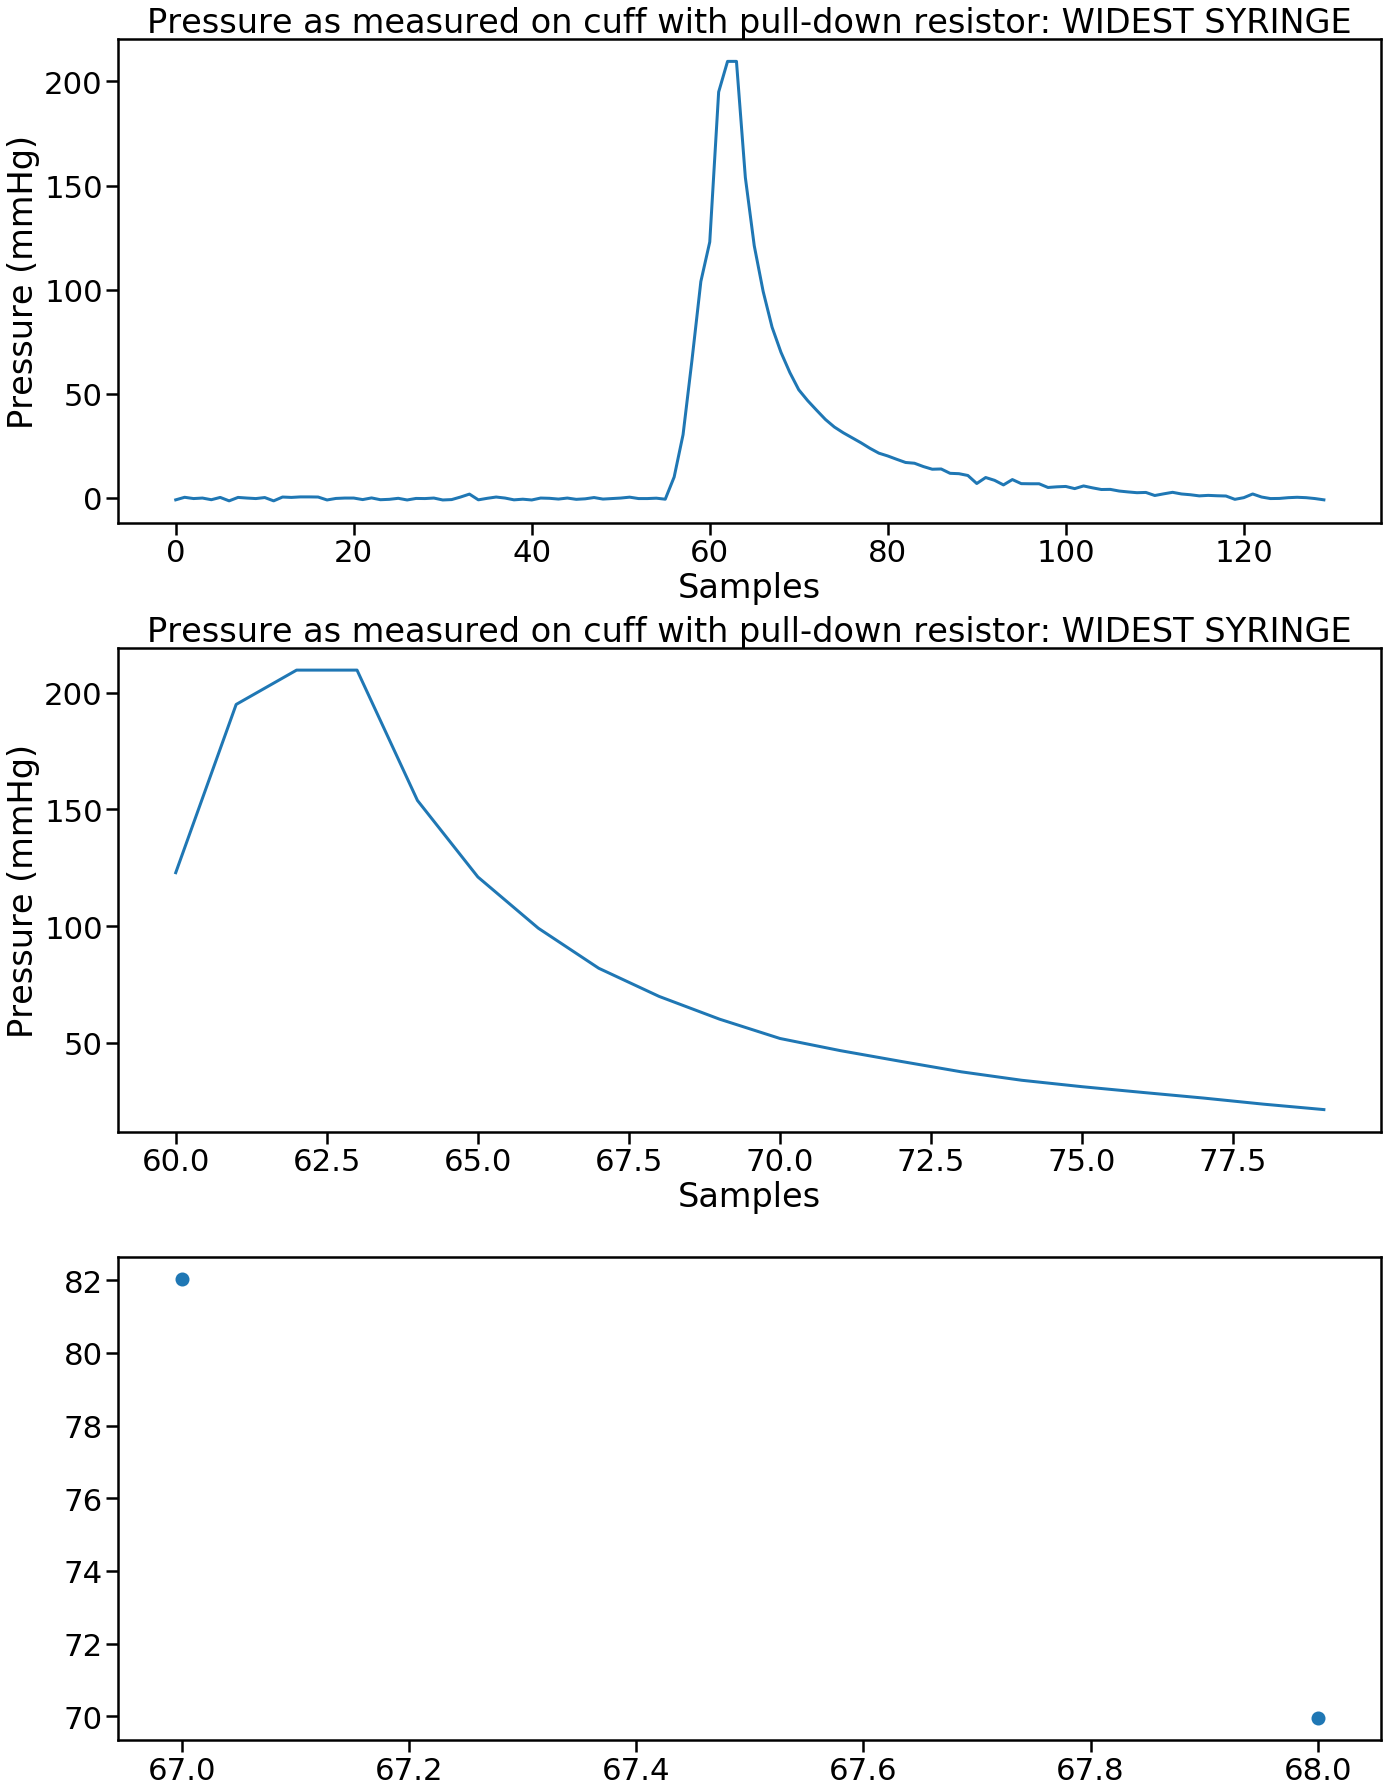

In [12]:
pressure_gauge01 = bitstommHg(pd.read_csv("data/potentially_aileentest02_0124.csv", delimiter = ",")) # biggest gauge, 22 ga?
fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge01)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
plt.tight_layout()

# display(pressure_gauge01.head())

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge01[0:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge01[60:80])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.scatter([67,68],pressure_gauge01[67:69]);
# ax3.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax3.set_xlabel("Samples")
# ax3.set_ylabel("Pressure (mmHg)")

plt.tight_layout()



This is the second trial.

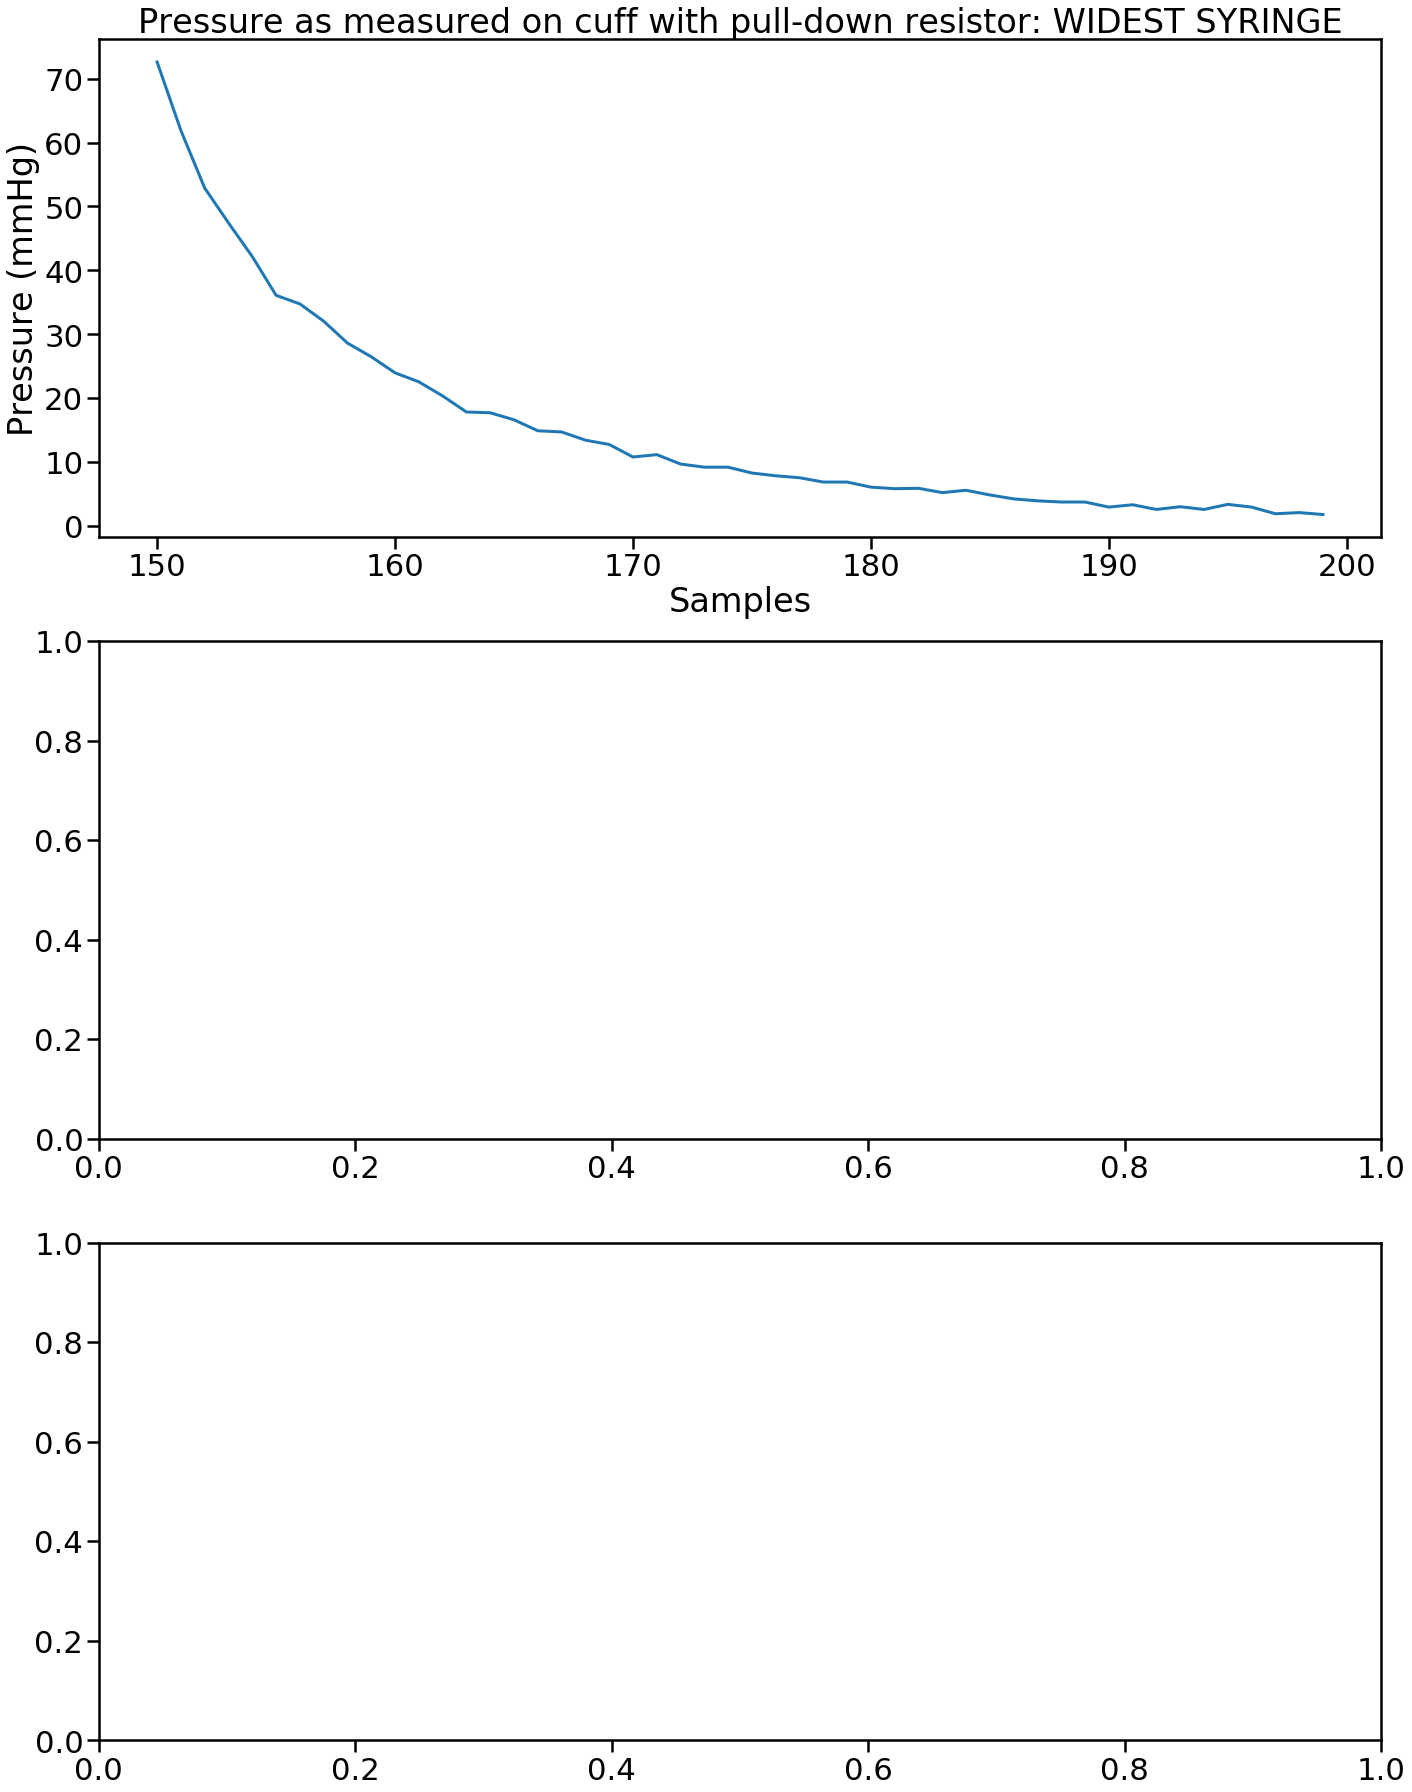

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge01[150:200])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
# ax2.plot(pressure_gauge01[70:130])
# ax2.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax2.set_xlabel("Samples")
# ax2.set_ylabel("Pressure (mmHg)")
# ax3.plot(pressure_gauge01[80:100]);
# ax3.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax3.set_xlabel("Samples")
# ax3.set_ylabel("Pressure (mmHg)")

plt.tight_layout()

This is the third trial.

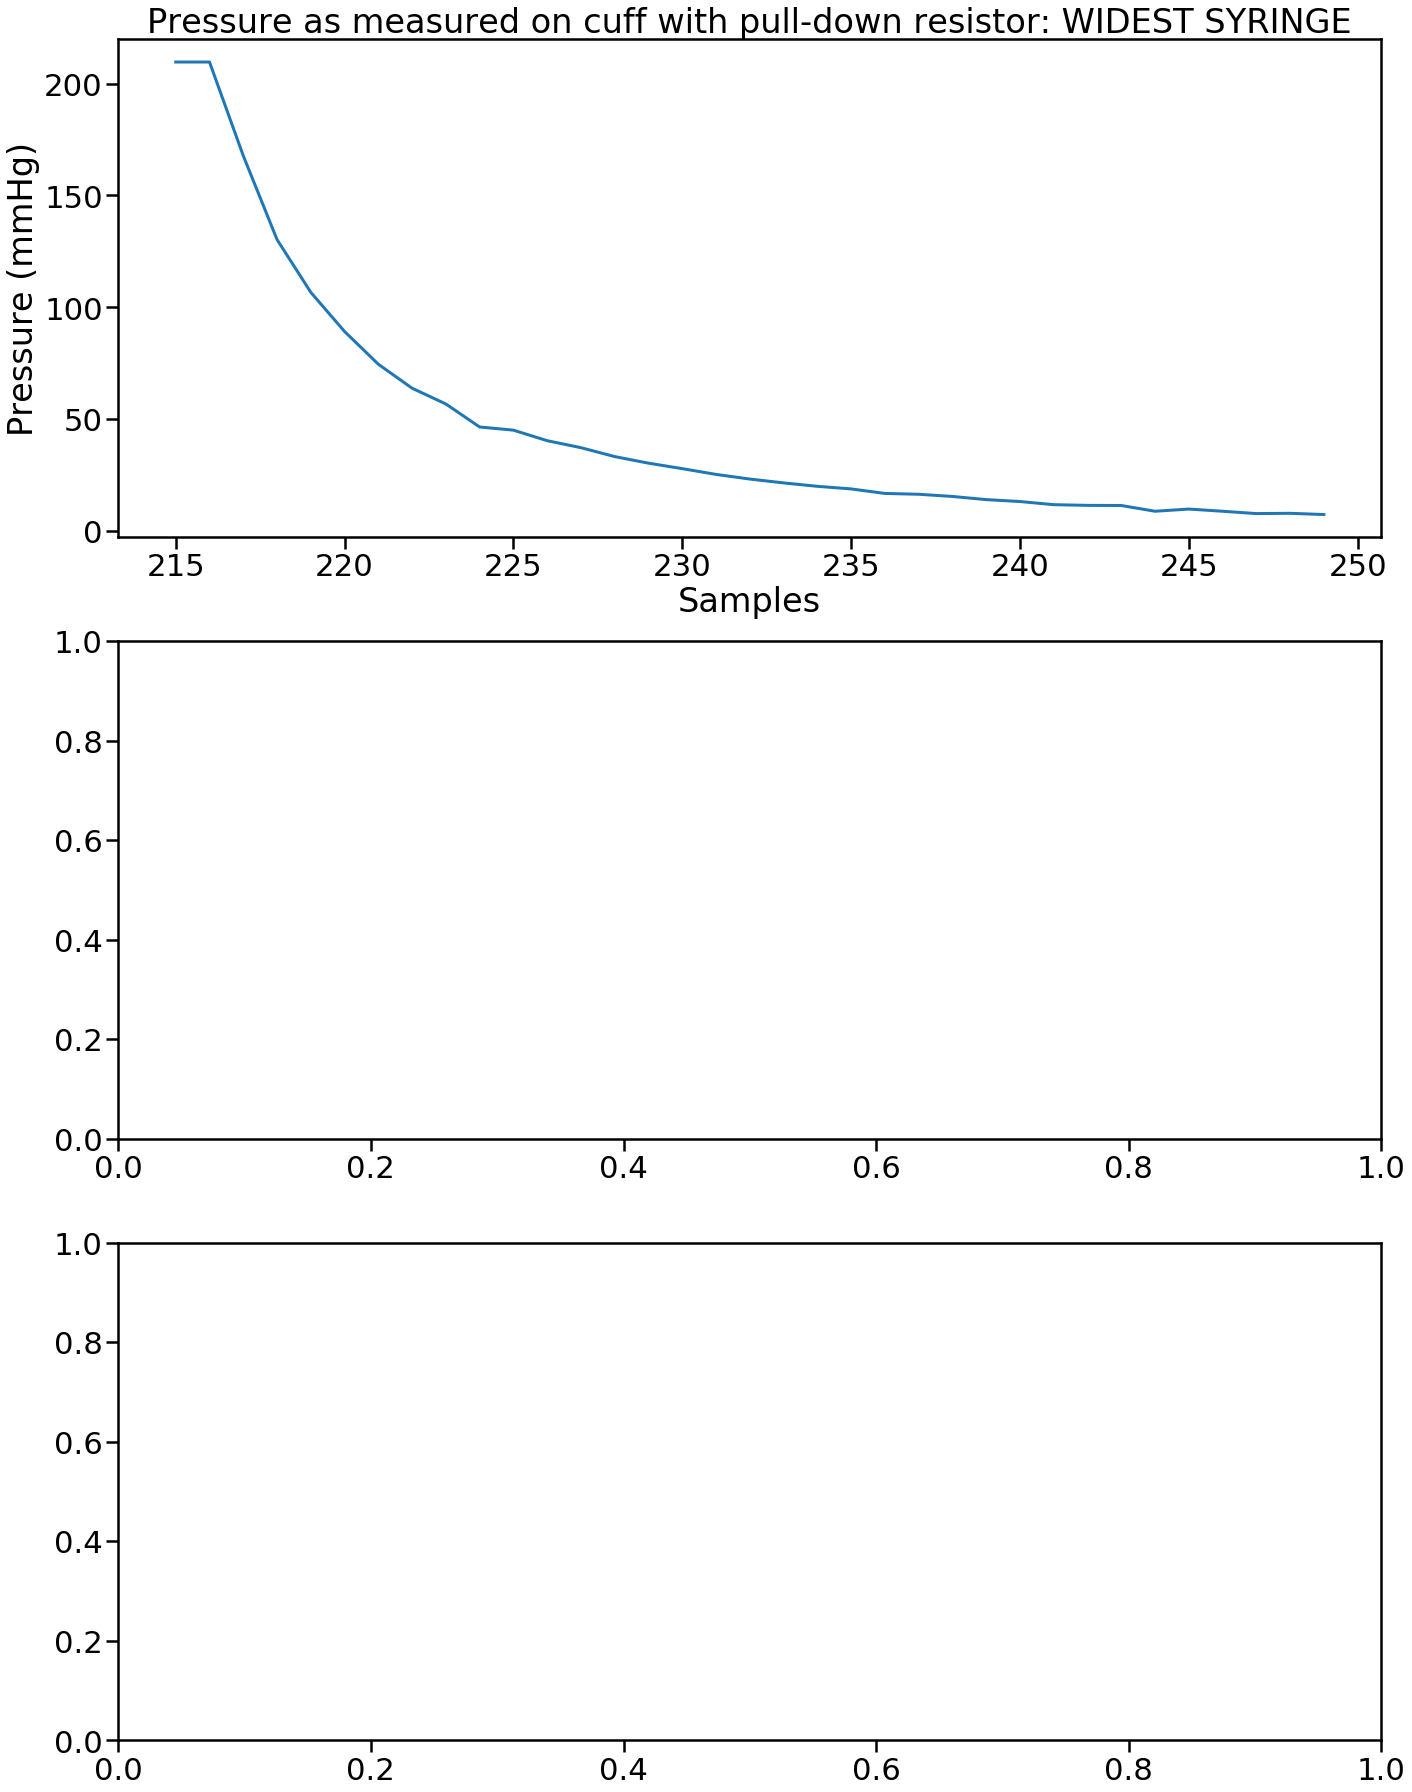

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge01[215:250])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
# ax2.plot(pressure_gauge01[70:130])
# ax2.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax2.set_xlabel("Samples")
# ax2.set_ylabel("Pressure (mmHg)")
# ax3.plot(pressure_gauge01[80:100]);
# ax3.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax3.set_xlabel("Samples")
# ax3.set_ylabel("Pressure (mmHg)")

plt.tight_layout()

This is the fourth trial.

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge01[285:300])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
# ax2.plot(pressure_gauge01[70:130])
# ax2.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax2.set_xlabel("Samples")
# ax2.set_ylabel("Pressure (mmHg)")
# ax3.plot(pressure_gauge01[80:100]);
# ax3.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax3.set_xlabel("Samples")
# ax3.set_ylabel("Pressure (mmHg)")

plt.tight_layout()

This is the fifth trial.

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge01[415:425])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
# ax2.plot(pressure_gauge01[70:130])
# ax2.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax2.set_xlabel("Samples")
# ax2.set_ylabel("Pressure (mmHg)")
# ax3.plot(pressure_gauge01[80:100]);
# ax3.set_title("Pressure as measured on cuff with pull-down resistor: WIDEST SYRINGE")
# ax3.set_xlabel("Samples")
# ax3.set_ylabel("Pressure (mmHg)")

plt.tight_layout()

In [ ]:
pressure_gauge02 = pd.read_csv("data/aileentest03_0124.csv", delimiter = ",") # second biggest gauge
fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge02)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 2ND WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge02[20:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 2ND WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge02[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: 2ND WIDEST SYRINGE")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge02[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: 2ND WIDEST SYRINGE")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)");
plt.tight_layout()


In [ ]:
pressure_gauge03 = pd.read_csv("data/aileentest04_0124.csv", delimiter = ",") # third biggest gauge

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge03)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 3RD WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge03[20:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 3RD WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge03[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: 3RD WIDEST SYRINGE")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge03[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: 3RD WIDEST SYRINGE")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)");

In [ ]:
pressure_gauge04 = pd.read_csv("data/aileentest05_0124.csv", delimiter = ",")[0:1400] # fourth biggest gauge

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge04)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge04[20:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge04[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge04[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)")
plt.tight_layout();

The following section includes initial data recordings. The first set includes data on the 30 gauge. The 2nd include data taken without a syringe. The third and fourth include data on the 22 gauge, however, there seemed to be a loss in connectivity that may have affected the recording. The 5th is data on the 22 gauge as well.

In [ ]:
pressure_gauge05_01 = pd.read_csv("data/more pressure/aileentest01_smallest_0124.csv", delimiter = ",") # smallest

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge05_01)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

pressure_gauge05_01 = pd.read_csv("data/more pressure/aileentest01_smallest_0124.csv", delimiter = ",")[335:] # smallest

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge05_01)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge05_01[90:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge05_01[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge05_01[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)");

In [ ]:
pressure_gauge05_02 = pd.read_csv("data/more pressure/aileentest02_smallest_0124.csv", delimiter = ",") # smallest

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge05_02)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 02")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge05_02[20:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 02")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge05_02[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 02")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge05_02[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 02")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)")
plt.tight_layout();

In [ ]:
pressure_gauge05_03 = pd.read_csv("data/more pressure/aileentest03_smallest_0124.csv", delimiter = ",") # smallest

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge05_03)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 03")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge05_03[20:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 03")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge05_03[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 03")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge05_03[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 03")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)")
plt.tight_layout();

In [ ]:
pressure_gauge05 = pd.read_csv("data/more pressure/aileentest04_smallest_0124.csv", delimiter = ",") # third biggest gauge

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge05)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge05[20:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge05[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge05[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: 4TH WIDEST SYRINGE")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)")
plt.tight_layout();

In [ ]:
pressure_gauge05_04 = pd.read_csv("data/more pressure/aileentest04_smallest_0124.csv", delimiter = ",") # smallest

fig, ax1 = plt.subplots(1,1, figsize = (15, 7))
ax1.plot(pressure_gauge05_04)
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 04")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,25))
ax1.plot(pressure_gauge05_04[20:130])
ax1.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 04")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Pressure (mmHg)")
ax2.plot(pressure_gauge05_04[40:70])
ax2.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 04")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Pressure (mmHg)")
ax3.plot(pressure_gauge05_04[48:57])
ax3.set_title("Pressure as measured on cuff with pull-down resistor: SMALLEST SYRINGE 04")
ax3.set_xlabel("Samples")
ax3.set_ylabel("Pressure (mmHg)")
plt.tight_layout();